In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
new_data = pd.read_csv("lung.csv")
print(new_data.shape)

(205, 12601)


## 1. Mutual Info[F1] 
## 2. F Classif[F2] 
## 3.T-Test[F3]

## (c) 2. F2( N features ) → F3( 2N/3 features out of selected features from F2) →    
##           F1(N/3 features out of selected features from F3)

# Preprocessing

In [31]:
new_data.head()

,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
0,discrete,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous
1,class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,AD,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,AD,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09


In [32]:
df = new_data.iloc[2:,:] # Removes first two tubles
print('Required data set ')
df.head()

Required data set 


,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,AD,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,AD,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,AD,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,AD,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,AD,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [33]:
df.isnull().sum()

class          0
38691_s_at     0
37864_s_at     0
33273_f_at     0
33274_f_at     0
              ..
41422_at       0
39964_at       0
36120_at       0
40571_at       0
36312_at       0
Length: 12601, dtype: int64

In [34]:
df.iloc[:,0].unique()
df[df.columns[0]] = pd.factorize(df[df.columns[0]])[0]
df.head()

,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,0,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,0,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,0,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,0,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,0,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [35]:
feature_set = df.iloc[:,1:]
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['38691_s_at ', '37864_s_at ', '33273_f_at ', '33274_f_at ', '33501_r_at ', '33500_i_at ', '33499_s_at ', '41164_at ', '38194_s_at ', '37004_at ', '40808_at ', '41827_f_at ', '34105_f_at ', '41165_g_at ', '769_s_at ', '33699_at ', '31444_s_at ', '33383_f_at ', '37039_at ', '32052_at ', '32805_at ', '34301_r_at ', '33322_i_at ', '35566_f_at ', '35083_at ', '33377_at ', '34342_s_at ', '32252_at ', '36780_at ', '31687_f_at ', '37383_f_at ', '39248_at ', '34485_r_at ', 'AFFX ', '35905_s_at ', '676_g_at ', '35530_f_at ', '39026_r_at ', '41237_at ', 'AFFX-HUMGAPDH/M33197_5_at ', '32648_at ', '39016_r_at ', '35016_at ', '613_at ', '38784_g_at ', '36130_f_at ', '38126_at ', '36785_at ', 'AFFX-HUMGAPDH/M33197_3_at ', '38582_at ', '31525_s_at ', '32275_at ', '39220_at ', '31477_at ', '33261_at ', '700_s_at ', '37021_at ', '201_s_at ', '41446_f_at ', '37897_s_at ', '31586_f_at ', '35474_s_at ', '2027_at ', '39594_f_at ', '41745_at ', '31557_at ', '38095_i_at ', '40544_g_at ', '390

In [36]:
feature_set.head()

,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,8.92,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,1120.1,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,1212.9,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,4422.72,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,4116.73,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [37]:
target_feature = df.iloc[:,0]
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: class , dtype: int64

In [38]:
temp_feature_set=StandardScaler().fit_transform(feature_set)
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
0,-0.921957,0.089114,-0.358903,-0.308779,-1.224893,-1.129251,-1.347017,-0.940166,-0.240499,-1.231893,...,0.029278,0.676299,1.202205,-0.259985,-0.322778,-0.446593,0.474743,0.521697,-0.284627,-0.778784
1,-0.566868,0.941621,1.285483,1.300554,0.995647,1.106711,1.323679,1.577288,0.611542,-0.588631,...,0.764167,-0.102548,-0.203140,0.300033,0.667041,0.493047,0.575154,-0.680777,0.170760,0.970673
2,0.210410,1.217338,1.220395,1.091475,0.415313,0.296740,0.648918,0.107713,0.923282,-0.534910,...,0.063735,-0.177118,-0.877780,0.181972,0.369599,0.313565,-0.152354,-0.170210,-0.103233,-0.248916
3,-0.921615,1.284640,1.309472,1.307123,0.868111,0.682642,0.941947,2.188311,1.105149,1.323253,...,0.472345,0.265087,0.445315,0.279944,0.153813,-0.199728,0.107092,1.200160,0.240210,0.929277
4,0.411684,0.972753,1.099487,1.251929,0.743846,0.688795,0.768647,0.721515,1.256965,1.146115,...,0.437278,-1.210363,0.056858,-0.410189,0.670146,0.181904,-0.090923,-0.361868,-0.218031,-0.055947


# Training and Spilting of Data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((162, 12600), (41, 12600))

In [40]:
y_train.shape, y_test.shape

((162,), (41,))

In [41]:
columns = feature_set.shape[1]

number_of_features_required_1 = 2*(columns/3)
number_of_features_required_2 = columns/3
number_of_features_required_3 = 0.19*columns

print('number_of_features_required_1 : '+str(number_of_features_required_1))
print('number_of_features_required_2 : '+str(number_of_features_required_2))
print('number_of_features_required_3 : '+str(number_of_features_required_3))

number_of_features_required_1 = int(number_of_features_required_1)
number_of_features_required_2 = int(number_of_features_required_2)
number_of_features_required_3 = int(number_of_features_required_3)

print('number_of_features_required_1 in integers: '+str(number_of_features_required_1))
print('number_of_features_required_2 in integers: '+str(number_of_features_required_2))
print('number_of_features_required_3 in integers: '+str(number_of_features_required_3))

number_of_features_required_1 : 8400.0
number_of_features_required_2 : 4200.0
number_of_features_required_3 : 2394.0
number_of_features_required_1 in integers: 8400
number_of_features_required_2 in integers: 4200
number_of_features_required_3 in integers: 2394


# Selection of features using F Classification 

In [42]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: #Here, we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]   # It is storing the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features_fc = correlation(X_train, 0.5)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :3092.2221059799194 seconds


In [43]:
print('Length of selected features : '+str(len(selected_features_fc)))

Length of selected features : 11523


In [44]:
selected_features_fc = list(selected_features_fc)
print('Selected features using F classification')
print(selected_features_fc)

Selected features using F classification
['36821_at ', '33037_at ', '34676_at ', '32538_at ', '35936_g_at ', '35120_at ', '37423_at ', '34649_at ', '32276_at ', '33956_at ', '31733_at ', '40941_at ', '32233_at ', '38112_g_at ', '37632_s_at ', '1069_at ', '36296_at ', '41768_at ', '33171_s_at ', '34271_at ', '38276_at ', '38861_at ', '32437_at ', '391_at ', '33557_at ', '35582_at ', '40022_at ', '40767_at ', '40541_at ', '32637_r_at ', '36747_at ', '202_at ', '40961_at ', '41835_at ', '41034_s_at ', '32036_i_at ', '38637_at ', '34791_at ', '38203_at ', '38122_at ', '34773_at ', '33773_at ', '40879_at ', '39107_at ', '37538_at ', '35652_g_at ', '40144_at ', '34101_at ', '39730_at ', '35967_at ', '31671_at ', '35758_at ', '897_at ', '40464_g_at ', '37833_at ', '38196_at ', '663_at ', '34737_at ', '31663_at ', '40041_at ', '31622_f_at ', '32172_at ', '38118_at ', '36648_at ', '35411_at ', '38261_at ', '32897_at ', '38454_g_at ', '1480_at ', '31643_at ', '40298_at ', '37828_at ', '36171_at 

In [45]:
required_features_fc = selected_features_fc[:number_of_features_required_1]
print('Length of required features : '+str(len(required_features_fc)))

Length of required features : 8400


In [46]:
X_train1 = X_train[required_features_fc]
X_train1.head()

,36821_at,33037_at,34676_at,32538_at,35936_g_at,35120_at,37423_at,34649_at,32276_at,33956_at,...,1935_at,31396_r_at,33091_at,32887_at,40809_at,31589_at,32012_at,39561_at,1177_at,34594_at
116,-0.697623,-1.451292,-0.591825,-0.404898,-1.269084,-1.331980,-1.111657,-1.499630,0.629941,-0.080196,...,-1.630586,0.343407,-1.165198,-0.428681,-0.097462,-1.712018,-1.555268,0.349142,-0.813403,-1.778872
55,-1.129627,-0.826602,-1.016800,-0.336834,0.171120,-1.047743,-0.795286,-0.753405,0.163353,0.137843,...,-0.696087,0.862738,-1.305406,-0.076727,0.539997,-0.951024,-0.849286,0.346058,-0.659606,-1.275368
26,-0.342690,0.995487,0.499166,-0.065956,-0.096663,0.010849,1.384803,1.246730,0.430630,-0.511340,...,0.917019,-1.170050,0.304922,-0.439706,0.793307,0.854777,0.495240,-0.815013,0.328773,0.924747
130,-0.560054,-0.800260,-0.640125,0.199243,-0.825785,0.057223,0.599626,1.274908,-1.204613,0.416065,...,-0.386132,0.664482,-0.699963,-0.536387,-2.124219,-0.703077,-0.640286,-0.532619,-0.622624,-0.647797
177,1.338675,1.145309,-0.679007,-0.288228,0.490212,-0.401714,-0.088722,0.168688,-1.857052,-0.355951,...,-0.608043,-1.368447,-0.786937,-1.386590,-1.574744,-0.582483,-0.507838,1.150236,-0.260732,-0.398630


# Feature Selection Using T-Test

In [47]:
import statistics

In [56]:
temp_index = [df.columns[0]] + required_features_fc
new_df = df[temp_index]
new_df.shape
start_time_t = time.time()
x= new_df.values.copy()              # It is converting df into numpy arrray


a,b = x.shape     # Here, a is taking row and b is taking columns        
n1 =0
n2 = 0
n3=0
n4 = 0
n5 = 0

for i in range(a):        
    if x[i][0] == 0:
        n1 = n1 + 1;
    elif x[i][0] ==1:
        n2 = n1 + 1;
    elif x[i][0] == 2:
        n3 = n1 + 1;
    elif x[i][0] ==3:
        n4 = n1 + 1;
    else:
        n5 = n1 + 1;

n = [n1,n2,n3,n4,n5]



tval=[]
sample1=[]
sample2=[]
sample3=[]
sample4=[]
sample5=[]

# It is calculating t value
for j in range(1,b):      
    for i in range(a):

        if x[i][0]==0:          
            sample1.append(x[i][j])
        elif x[i][0]== 1:
            sample2.append(x[i][j])
        elif x[i][0]== 2:
            sample3.append(x[i][j])
        elif x[i][0]== 3:
            sample4.append(x[i][j])
        else :
            sample5.append(x[i][j])

# It is converting sample values from string to float
    sample1 = list(map(float,sample1))       
    sample2 = list(map(float,sample2))
    sample3 = list(map(float, sample3))
    sample4 = list(map(float, sample4))
    sample5 = list(map(float, sample5))

    sample = [sample1,sample2,sample3,sample4,sample5]



    sbar = [0,0,0,0,0]
    svar = [0,0,0,0,0]
    tset = []
    for p in range(5):
         sbar[p] =  statistics.mean(sample[p])         
            
    for q in range(5):
        svar[q] = statistics.variance(sample[q])     




    for m in range(4):

        for k in range(m+1,5):
          t = abs(sbar[m] - sbar[k])/np.sqrt(svar[m]/n[m]+svar[m]/n[k])  # It is calculating t value by comparing mean and variance using given formula
          tset.append(t)

    tavg = statistics.mean(tset)
    tval.append(tavg)       
    
    sample1.clear()    
    sample2.clear()
    sample3.clear()
    sample4.clear()
    sample5.clear()
    tset.clear()



sort_index=[]

sort_index = sorted(range(len(tval)), key=lambda k: tval[k])   

new_index = [p+1 for p in sort_index]   
new_index.reverse()  

required_features_t = new_index[:number_of_features_required_3]   #It is selecting important features
print('Time taken by T Test is :'+str(time.time() - start_time_t)+' seconds')

Time taken by T Test is :24.35227680206299 seconds


In [57]:
print(required_features_t)

[511, 8218, 3462, 1990, 7111, 2302, 903, 1166, 8078, 4089, 1949, 440, 2341, 5633, 1295, 1083, 3506, 1641, 6032, 2482, 3464, 795, 4754, 1001, 5961, 2578, 8347, 5487, 2642, 6399, 6681, 6255, 4120, 3354, 6171, 6335, 2655, 7651, 6594, 1994, 7016, 1718, 1760, 337, 4302, 157, 6589, 8194, 6249, 1953, 1503, 5001, 7245, 6885, 3063, 7135, 2527, 5918, 5468, 4249, 34, 2619, 4371, 1973, 5182, 2222, 5183, 1054, 2735, 1154, 8254, 1191, 4714, 6706, 1774, 41, 7671, 4669, 4995, 6958, 1689, 5984, 392, 6647, 389, 4687, 2937, 1711, 2115, 6909, 6964, 2837, 1941, 5304, 2067, 7132, 3014, 5403, 7653, 7852, 5478, 989, 1598, 4163, 7659, 6122, 2489, 5283, 2479, 2804, 3044, 3745, 3864, 2521, 598, 6500, 7568, 7243, 4320, 6930, 5977, 7752, 1220, 1420, 7069, 6376, 3724, 8182, 972, 1134, 7645, 61, 6604, 7838, 5069, 6397, 7841, 281, 5090, 7618, 4592, 1795, 3762, 91, 4325, 2338, 6463, 3056, 5746, 5446, 3779, 854, 4399, 1118, 4694, 1423, 2901, 1308, 2008, 6112, 6203, 6475, 2748, 3475, 6791, 8093, 1210, 2976, 436, 379, 32

In [58]:
df1 = df.iloc[:,required_features_t]
selected_features_tt=list(df1)
print('Length of selected_features_tt : ',len(selected_features_tt))

Length of selected_features_tt :  2394


In [59]:
print('selected_features_tt :',selected_features_tt)

selected_features_tt : ['41785_at ', '39913_at ', '32522_f_at ', '34874_at ', '33176_at ', '36454_at ', '36102_at ', '32550_r_at ', '1694_s_at ', '37373_at ', '39817_s_at ', '37032_at ', '38812_at ', '41566_at ', '39507_at ', '38681_at ', '1467_at ', '40189_at ', '40831_at ', '479_at ', '34689_at ', '41416_at ', '373_at ', '41492_r_at ', '39124_r_at ', '33708_at ', '41555_at ', '40068_at ', '35264_at ', '236_at ', '40956_at ', '38759_at ', '38106_at ', '32177_s_at ', '41073_at ', '34065_at ', '38475_at ', '33007_at ', '40843_at ', '38813_at ', '34512_at ', '37393_at ', '33452_at ', '326_i_at ', '36239_at ', '33754_at ', '1388_g_at ', '644_at ', '41317_at ', '32822_at ', '39337_at ', '41705_at ', '34010_at ', '33197_at ', '39174_at ', '627_g_at ', '40480_s_at ', '37774_at ', '1455_f_at ', '38656_s_at ', 'AFFX ', '33266_at ', '39651_at ', '35956_s_at ', '37444_at ', '40099_at ', '39514_s_at ', '35912_at ', '41776_at ', '34183_at ', '1978_at ', '498_at ', '39750_at ', '1682_s_at ', '33305

In [60]:
X_train2 = X_train.iloc[:,required_features_t]
X_train2.head()

,31685_at,32342_at,1127_at,35338_at,34453_at,37029_at,38791_at,37279_at,35447_s_at,32181_at,...,41637_at,440_at,37655_at,36173_r_at,35402_at,33614_at,33811_at,34664_at,31861_at,35482_at
116,-0.153448,-1.355903,-0.493579,-0.073885,-1.459022,-0.185236,-0.582319,-0.440081,-1.916732,-0.238083,...,-0.399189,-0.913100,-0.398531,-1.484056,-1.158359,-0.125239,-0.919501,-1.275386,-1.236731,-0.415693
55,-0.244696,-0.651582,0.203857,-0.514445,-0.677190,-0.691764,0.017704,-0.238532,-1.082589,0.378474,...,-0.906492,-0.430153,0.007074,-0.120417,-0.246146,-0.386301,-1.001621,-0.854996,-0.372728,-0.403261
26,0.065192,0.793817,-0.228090,0.560942,0.097014,-0.482400,0.702802,0.967539,0.952880,0.194610,...,-0.377138,0.124676,0.211041,-0.772856,1.882149,0.488134,0.061915,-0.390062,0.231185,0.184597
130,-0.015377,-0.159360,-0.169888,1.488089,-0.627325,0.739199,1.828984,-0.416971,-2.081640,1.582987,...,0.737193,-0.589139,-1.104596,1.093340,-0.311606,-1.641926,-0.373668,-0.036398,0.627459,-0.459514
177,-0.126749,-0.228229,-0.783310,-0.076700,0.124365,-0.024702,2.288413,0.122134,1.288332,-0.842028,...,-0.218090,-0.584282,-0.615807,0.848076,-0.974374,0.146956,-0.675589,0.609035,0.589652,-0.361771


# Selection of features using Mutual Information 

In [61]:
from scipy.special import digamma
def mutual_info(data,x_index,target):
  x=data[x_index]
  y=target
  
  combo_d= np.vstack((x,y)).T # It is Combining the data values
  
  n=len(x)
  n_x=[]
  unique_y=len(set(y))
  
  for i in range(unique_y):
    n_x.append([]) 
  for item in combo_d:
    index=int(item[1])
    n_x[index].append(item)
  I_i=np.zeros(len(x))
  indx=0
  for pt in combo_d:
    distx=[]
    
    #Calculating distance of a point with all other points in the same class
    for pt_c in n_x[int(pt[1])]:
      if pt_c[0]==pt[0]:
        continue
      distx.append(abs(pt_c[0]-pt[0]))
    distx.sort()
    
    k=2
    kth_dist_c=distx[k-1]
    dist=[]
    
    #Calculating distance of a point with all other points in the data set
    for pt_all in combo_d:
      if pt_all[0]==pt[0] and pt_all[1]==pt[1]:
        continue
      dist.append(abs(pt_all[0]-pt[0]))
    
    m_i=0
    for i in range(len(dist)):
      if dist[i]<=kth_dist_c:
        m_i+=1
   
    n_x_i=len(n_x[int(pt[1])])
  
    I_i[indx]=digamma(n)-digamma(n_x_i)+digamma(k)-digamma(m_i)
    indx+=1
  mutual_info_xy=np.sum(I_i)/n
  return abs(mutual_info_xy)
  

In [62]:

X_train_tp=[]
temp=X_train2.values.transpose()
for arr in temp:
  X_train_tp.append(arr.astype(float))

mi_start_time = time.time()

total_features=len(required_features_t)

mutual_information= np.zeros(total_features)
for i in range(total_features):
  mutual_information[i]=mutual_info(X_train_tp,i,y_train)
  print('Mutual Information between Target Class and Feature_'+feature_name[i]+' : ',mutual_information[i])
    
print('Time taken by Mutual Information is :'+str(time.time() - mi_start_time)+' seconds')

Mutual Information between Target Class and Feature_38691_s_at  :  0.13159417545890403
Mutual Information between Target Class and Feature_37864_s_at  :  0.19236776167310604
Mutual Information between Target Class and Feature_33273_f_at  :  0.10723812278291507
Mutual Information between Target Class and Feature_33274_f_at  :  0.01858636960869345
Mutual Information between Target Class and Feature_33501_r_at  :  0.13704214992202512
Mutual Information between Target Class and Feature_33500_i_at  :  0.0646156088740995
Mutual Information between Target Class and Feature_33499_s_at  :  0.04863069986235738
Mutual Information between Target Class and Feature_41164_at  :  0.08044496457448234
Mutual Information between Target Class and Feature_38194_s_at  :  0.16998431175756673
Mutual Information between Target Class and Feature_37004_at  :  0.13346890229307362
Mutual Information between Target Class and Feature_40808_at  :  0.023341728919392832
Mutual Information between Target Class and Featu

Mutual Information between Target Class and Feature_31545_at  :  0.0022165326245557086
Mutual Information between Target Class and Feature_39775_at  :  0.011763894243984526
Mutual Information between Target Class and Feature_829_s_at  :  0.15620883765664723
Mutual Information between Target Class and Feature_38465_at  :  0.09812575841552178
Mutual Information between Target Class and Feature_37449_i_at  :  0.16642490643038238
Mutual Information between Target Class and Feature_31697_s_at  :  0.24201020608854557
Mutual Information between Target Class and Feature_36617_at  :  0.14502429909762776
Mutual Information between Target Class and Feature_37421_f_at  :  0.11076965962630693
Mutual Information between Target Class and Feature_33702_f_at  :  0.1418246123960553
Mutual Information between Target Class and Feature_273_g_at  :  0.0018914182095562016
Mutual Information between Target Class and Feature_31719_at  :  0.001121494888676611
Mutual Information between Target Class and Feature_

Mutual Information between Target Class and Feature_675_at  :  0.24631088928380565
Mutual Information between Target Class and Feature_34592_at  :  0.07275946931895887
Mutual Information between Target Class and Feature_40886_at  :  0.15047667339039783
Mutual Information between Target Class and Feature_36156_at  :  0.0725634365041792
Mutual Information between Target Class and Feature_40887_g_at  :  0.29019629928157753
Mutual Information between Target Class and Feature_32334_f_at  :  0.003199644473418109
Mutual Information between Target Class and Feature_40649_at  :  0.09565972623100365
Mutual Information between Target Class and Feature_34643_at  :  0.13336170003705633
Mutual Information between Target Class and Feature_36938_at  :  0.0935333794710344
Mutual Information between Target Class and Feature_37448_s_at  :  0.04036453889106455
Mutual Information between Target Class and Feature_35194_at  :  0.0016574701244583892
Mutual Information between Target Class and Feature_40201_at

Mutual Information between Target Class and Feature_36984_f_at  :  0.23115830115662295
Mutual Information between Target Class and Feature_41383_at  :  0.2003681357049595
Mutual Information between Target Class and Feature_1461_at  :  0.2731475407762799
Mutual Information between Target Class and Feature_32315_at  :  0.07579649714378126
Mutual Information between Target Class and Feature_36148_at  :  0.26330321563548226
Mutual Information between Target Class and Feature_36024_at  :  0.3519647846450381
Mutual Information between Target Class and Feature_917_g_at  :  0.12491099485678166
Mutual Information between Target Class and Feature_38429_at  :  0.09084380377543239
Mutual Information between Target Class and Feature_37473_at  :  0.12425989651591625
Mutual Information between Target Class and Feature_36773_f_at  :  0.31074216073052435
Mutual Information between Target Class and Feature_34235_at  :  0.08959835433754677
Mutual Information between Target Class and Feature_1005_at  :  0

Mutual Information between Target Class and Feature_32588_s_at  :  0.28811980395406955
Mutual Information between Target Class and Feature_34400_at  :  0.2826445833368086
Mutual Information between Target Class and Feature_37782_at  :  0.26865453877477175
Mutual Information between Target Class and Feature_34317_g_at  :  0.23945572807317592
Mutual Information between Target Class and Feature_36618_g_at  :  0.051796433569207774
Mutual Information between Target Class and Feature_32323_at  :  0.13240392281239283
Mutual Information between Target Class and Feature_39425_at  :  0.17495713578180774
Mutual Information between Target Class and Feature_37160_at  :  0.1430427966879813
Mutual Information between Target Class and Feature_37720_at  :  0.2489605421710669
Mutual Information between Target Class and Feature_32563_at  :  0.046707517891054165
Mutual Information between Target Class and Feature_40324_r_at  :  0.09175908925710584
Mutual Information between Target Class and Feature_41753_

Mutual Information between Target Class and Feature_36992_at  :  0.038040257381219696
Mutual Information between Target Class and Feature_38379_at  :  0.021628775334500354
Mutual Information between Target Class and Feature_32337_at  :  0.1431949040247689
Mutual Information between Target Class and Feature_32457_f_at  :  0.19626622498694554
Mutual Information between Target Class and Feature_34703_f_at  :  0.06909833021788071
Mutual Information between Target Class and Feature_33485_at  :  0.15775161953463493
Mutual Information between Target Class and Feature_32305_at  :  0.08384191073766771
Mutual Information between Target Class and Feature_32432_f_at  :  0.03957097170411406
Mutual Information between Target Class and Feature_32149_at  :  0.1175226061064428
Mutual Information between Target Class and Feature_36495_at  :  0.3538130202039514
Mutual Information between Target Class and Feature_32321_at  :  0.08974224027492572
Mutual Information between Target Class and Feature_32316_s_

Mutual Information between Target Class and Feature_32786_at  :  0.14417819280085067
Mutual Information between Target Class and Feature_1890_at  :  0.41950252372422125
Mutual Information between Target Class and Feature_556_s_at  :  0.005453872029780691
Mutual Information between Target Class and Feature_36097_at  :  0.1658811284154361
Mutual Information between Target Class and Feature_39921_at  :  0.31556324997787777
Mutual Information between Target Class and Feature_37298_at  :  0.1725020935555225
Mutual Information between Target Class and Feature_41280_r_at  :  0.052778259898854964
Mutual Information between Target Class and Feature_1008_f_at  :  0.020146579032783073
Mutual Information between Target Class and Feature_33820_g_at  :  0.11841446580812078
Mutual Information between Target Class and Feature_40766_at  :  0.16214121967621722
Mutual Information between Target Class and Feature_38722_at  :  0.15379421038934457
Mutual Information between Target Class and Feature_37168_at

Mutual Information between Target Class and Feature_36302_f_at  :  0.25026635447820295
Mutual Information between Target Class and Feature_40165_at  :  0.06617780945303002
Mutual Information between Target Class and Feature_36658_at  :  0.09416112988999975
Mutual Information between Target Class and Feature_1309_at  :  0.2241441793442822
Mutual Information between Target Class and Feature_40193_at  :  0.09148514895262226
Mutual Information between Target Class and Feature_40541_at  :  0.01846445535959263
Mutual Information between Target Class and Feature_31791_at  :  0.12491168085052097
Mutual Information between Target Class and Feature_38385_at  :  0.05889589407601218
Mutual Information between Target Class and Feature_40635_at  :  0.07648886452197982
Mutual Information between Target Class and Feature_296_at  :  0.060389054407268994
Mutual Information between Target Class and Feature_36986_at  :  0.07748592214807981
Mutual Information between Target Class and Feature_41185_f_at  : 

Mutual Information between Target Class and Feature_668_s_at  :  0.09760495223985431
Mutual Information between Target Class and Feature_38408_at  :  0.09982599840959658
Mutual Information between Target Class and Feature_33671_f_at  :  0.09209316890133812
Mutual Information between Target Class and Feature_37210_at  :  0.12359971033423581
Mutual Information between Target Class and Feature_37026_at  :  0.02449264665253815
Mutual Information between Target Class and Feature_36608_at  :  0.029486354938117625
Mutual Information between Target Class and Feature_41484_r_at  :  0.07266339485507041
Mutual Information between Target Class and Feature_36452_at  :  0.16613915022350498
Mutual Information between Target Class and Feature_33399_at  :  0.28032713107817714
Mutual Information between Target Class and Feature_33845_at  :  0.13686421338291335
Mutual Information between Target Class and Feature_38121_at  :  0.12661789818212502
Mutual Information between Target Class and Feature_40790_at

Mutual Information between Target Class and Feature_271_s_at  :  0.04038841435662306
Mutual Information between Target Class and Feature_31815_r_at  :  0.01903412682855942
Mutual Information between Target Class and Feature_260_at  :  0.25379693224573563
Mutual Information between Target Class and Feature_39350_at  :  0.0003471135672044018
Mutual Information between Target Class and Feature_40436_g_at  :  0.26845831253442015
Mutual Information between Target Class and Feature_38995_at  :  0.05927251728822231
Mutual Information between Target Class and Feature_34642_at  :  0.06287404708522487
Mutual Information between Target Class and Feature_36614_at  :  0.1558362996420777
Mutual Information between Target Class and Feature_39331_at  :  0.1752042774716693
Mutual Information between Target Class and Feature_37065_f_at  :  0.08933512902833964
Mutual Information between Target Class and Feature_38647_at  :  0.0817110748142253
Mutual Information between Target Class and Feature_32192_g_at

Mutual Information between Target Class and Feature_32885_f_at  :  0.09632868900322787
Mutual Information between Target Class and Feature_37364_at  :  0.12222365671865597
Mutual Information between Target Class and Feature_1665_s_at  :  0.04697775487334417
Mutual Information between Target Class and Feature_32324_at  :  0.11158928895458965
Mutual Information between Target Class and Feature_36979_at  :  0.05062598410196023
Mutual Information between Target Class and Feature_32530_at  :  0.041676046395711604
Mutual Information between Target Class and Feature_1549_s_at  :  0.2228917945206853
Mutual Information between Target Class and Feature_38527_at  :  0.11431245148673866
Mutual Information between Target Class and Feature_35270_at  :  0.058247931865572825
Mutual Information between Target Class and Feature_39088_at  :  0.09282064381234191
Mutual Information between Target Class and Feature_38484_at  :  0.10568312257513007
Mutual Information between Target Class and Feature_40867_at

Mutual Information between Target Class and Feature_41386_i_at  :  0.04847050961574986
Mutual Information between Target Class and Feature_37924_g_at  :  0.1081615579587678
Mutual Information between Target Class and Feature_39722_at  :  0.0012342056970791762
Mutual Information between Target Class and Feature_41867_at  :  0.07114465309586711
Mutual Information between Target Class and Feature_35691_r_at  :  0.23237094956649043
Mutual Information between Target Class and Feature_40774_at  :  0.1009991616515649
Mutual Information between Target Class and Feature_41814_at  :  0.02072422241198338
Mutual Information between Target Class and Feature_36975_at  :  0.005847758175540117
Mutual Information between Target Class and Feature_1788_s_at  :  0.1471696264394407
Mutual Information between Target Class and Feature_32893_s_at  :  0.04056839324977408
Mutual Information between Target Class and Feature_38681_at  :  0.010063527951077459
Mutual Information between Target Class and Feature_388

Mutual Information between Target Class and Feature_31419_r_at  :  0.07204728660660653
Mutual Information between Target Class and Feature_38065_at  :  0.06883224103477253
Mutual Information between Target Class and Feature_32529_at  :  0.14501852077047964
Mutual Information between Target Class and Feature_35633_at  :  0.1947909303779286
Mutual Information between Target Class and Feature_38773_at  :  0.22756779659686702
Mutual Information between Target Class and Feature_32313_at  :  0.2683271900455939
Mutual Information between Target Class and Feature_32752_at  :  0.0746921416938596
Mutual Information between Target Class and Feature_41504_s_at  :  0.004534719255057085
Mutual Information between Target Class and Feature_1399_at  :  0.0844895372948791
Mutual Information between Target Class and Feature_977_s_at  :  0.0889969794796922
Mutual Information between Target Class and Feature_34678_at  :  0.1662846415644111
Mutual Information between Target Class and Feature_33919_at  :  0.

Mutual Information between Target Class and Feature_36060_at  :  0.013949610391770919
Mutual Information between Target Class and Feature_34775_at  :  0.28216001434335797
Mutual Information between Target Class and Feature_1795_g_at  :  0.15917884126657136
Mutual Information between Target Class and Feature_1252_at  :  0.002123662786236622
Mutual Information between Target Class and Feature_632_at  :  0.17928786030586044
Mutual Information between Target Class and Feature_37346_at  :  0.21037370644137787
Mutual Information between Target Class and Feature_32392_s_at  :  0.07654448872410767
Mutual Information between Target Class and Feature_39382_at  :  0.06465235779939305
Mutual Information between Target Class and Feature_40622_r_at  :  0.030353945024374808
Mutual Information between Target Class and Feature_37268_at  :  0.12581109728053572
Mutual Information between Target Class and Feature_37675_at  :  0.16402804680262784
Mutual Information between Target Class and Feature_40954_at

Mutual Information between Target Class and Feature_37022_at  :  0.2312649694345575
Mutual Information between Target Class and Feature_1312_at  :  0.3947472442227248
Mutual Information between Target Class and Feature_31692_at  :  0.11436643601739206
Mutual Information between Target Class and Feature_31870_at  :  0.09491882295632208
Mutual Information between Target Class and Feature_34164_at  :  0.028185162922350227
Mutual Information between Target Class and Feature_39170_at  :  0.08241370429317718
Mutual Information between Target Class and Feature_39854_r_at  :  0.0846477485882344
Mutual Information between Target Class and Feature_40412_at  :  0.12245352037258454
Mutual Information between Target Class and Feature_40552_s_at  :  0.20287912698715896
Mutual Information between Target Class and Feature_32253_at  :  0.22532319774918438
Mutual Information between Target Class and Feature_688_at  :  0.03903923404445456
Mutual Information between Target Class and Feature_39992_at  :  0

Mutual Information between Target Class and Feature_37747_at  :  0.13874156702109372
Mutual Information between Target Class and Feature_36949_at  :  0.10910546396544643
Mutual Information between Target Class and Feature_40115_at  :  0.12231749348079847
Mutual Information between Target Class and Feature_39708_at  :  0.08596828086836397
Mutual Information between Target Class and Feature_408_at  :  0.015018263763337224
Mutual Information between Target Class and Feature_33371_s_at  :  0.06911260713396379
Mutual Information between Target Class and Feature_130_s_at  :  0.0765870160876645
Mutual Information between Target Class and Feature_36147_at  :  0.24121681328271255
Mutual Information between Target Class and Feature_31512_at  :  0.09446718157779939
Mutual Information between Target Class and Feature_35506_s_at  :  0.17374227200864178
Mutual Information between Target Class and Feature_35219_at  :  0.02179925070496641
Mutual Information between Target Class and Feature_1411_at  : 

Mutual Information between Target Class and Feature_39128_r_at  :  0.01308162953886409
Mutual Information between Target Class and Feature_35307_at  :  0.145262720445527
Mutual Information between Target Class and Feature_35808_at  :  0.03776925436765662
Mutual Information between Target Class and Feature_33727_r_at  :  0.1669690393331501
Mutual Information between Target Class and Feature_181_g_at  :  0.0023634709034691006
Mutual Information between Target Class and Feature_38017_at  :  0.12512330864496554
Mutual Information between Target Class and Feature_34771_at  :  0.1991207287180422
Mutual Information between Target Class and Feature_1827_s_at  :  0.14245625877531365
Mutual Information between Target Class and Feature_37014_at  :  0.22921236469253842
Mutual Information between Target Class and Feature_34727_at  :  0.11524180692913183
Mutual Information between Target Class and Feature_39351_at  :  0.1418091829671665
Mutual Information between Target Class and Feature_1160_at  : 

Mutual Information between Target Class and Feature_36503_at  :  0.06133803466821462
Mutual Information between Target Class and Feature_41292_at  :  0.09500125885138673
Mutual Information between Target Class and Feature_37082_at  :  0.11200324277860567
Mutual Information between Target Class and Feature_1984_s_at  :  0.1364968242146059
Mutual Information between Target Class and Feature_31891_at  :  0.10914791913263272
Mutual Information between Target Class and Feature_38738_at  :  0.2622062184003101
Mutual Information between Target Class and Feature_38649_at  :  0.009135692036410471
Mutual Information between Target Class and Feature_32591_at  :  0.0742613183288493
Mutual Information between Target Class and Feature_121_at  :  0.046572367592640176
Mutual Information between Target Class and Feature_40415_at  :  0.09087670527898498
Mutual Information between Target Class and Feature_32525_r_at  :  0.08447398146667832
Mutual Information between Target Class and Feature_1659_s_at  : 

Mutual Information between Target Class and Feature_37678_at  :  0.027405009860223567
Mutual Information between Target Class and Feature_32081_at  :  0.1768372176882123
Mutual Information between Target Class and Feature_33758_f_at  :  0.13116055957904052
Mutual Information between Target Class and Feature_40445_at  :  0.1607772988810138
Mutual Information between Target Class and Feature_39876_at  :  0.3442361479939452
Mutual Information between Target Class and Feature_32787_at  :  0.143802457740399
Mutual Information between Target Class and Feature_31893_at  :  0.04982095114133972
Mutual Information between Target Class and Feature_32408_s_at  :  0.22354689075021597
Mutual Information between Target Class and Feature_40302_at  :  0.2512827920660272
Mutual Information between Target Class and Feature_723_s_at  :  0.23223494048710644
Mutual Information between Target Class and Feature_33305_at  :  0.2003681742825857
Mutual Information between Target Class and Feature_34508_r_at  :  

Mutual Information between Target Class and Feature_32993_s_at  :  0.13452192135290153
Mutual Information between Target Class and Feature_35555_r_at  :  0.3023207256784198
Mutual Information between Target Class and Feature_37666_at  :  0.061975091253261
Mutual Information between Target Class and Feature_2093_s_at  :  0.14881617004188907
Mutual Information between Target Class and Feature_39685_at  :  0.005015021418217301
Mutual Information between Target Class and Feature_35341_at  :  0.1478307392257835
Mutual Information between Target Class and Feature_37366_at  :  0.1003460375154705
Mutual Information between Target Class and Feature_39011_at  :  0.04600515649148127
Mutual Information between Target Class and Feature_35205_at  :  0.1887490061692811
Mutual Information between Target Class and Feature_40016_g_at  :  0.028793987150688746
Mutual Information between Target Class and Feature_32314_g_at  :  0.163424728171686
Mutual Information between Target Class and Feature_36822_at  

Mutual Information between Target Class and Feature_32464_at  :  0.10090849877877081
Mutual Information between Target Class and Feature_41047_at  :  0.09835059508174782
Mutual Information between Target Class and Feature_37417_at  :  0.14338047968971346
Mutual Information between Target Class and Feature_34814_at  :  0.07400869168653308
Mutual Information between Target Class and Feature_33901_at  :  0.08269175293722031
Mutual Information between Target Class and Feature_34933_at  :  0.09902055991229916
Mutual Information between Target Class and Feature_36635_at  :  0.10657652097313319
Mutual Information between Target Class and Feature_31693_f_at  :  0.3175333382191607
Mutual Information between Target Class and Feature_33080_s_at  :  0.22711207504484685
Mutual Information between Target Class and Feature_34382_at  :  0.09462105376867924
Mutual Information between Target Class and Feature_40490_at  :  0.11529088301751064
Mutual Information between Target Class and Feature_35956_s_at

Mutual Information between Target Class and Feature_41413_at  :  0.005617347426471492
Mutual Information between Target Class and Feature_197_at  :  0.07000634376027973
Mutual Information between Target Class and Feature_40409_at  :  0.1392141843638024
Mutual Information between Target Class and Feature_37463_r_at  :  0.16304282465471043
Mutual Information between Target Class and Feature_36970_at  :  0.06341208988639868
Mutual Information between Target Class and Feature_35350_at  :  0.07338903725105277
Mutual Information between Target Class and Feature_31637_s_at  :  0.052287461393645894
Mutual Information between Target Class and Feature_37347_at  :  0.04449289933573666
Mutual Information between Target Class and Feature_36985_at  :  0.1661929561182415
Mutual Information between Target Class and Feature_33822_at  :  0.13687916184002713
Mutual Information between Target Class and Feature_41732_at  :  0.010635797357483281
Mutual Information between Target Class and Feature_33113_at  

Mutual Information between Target Class and Feature_36977_at  :  0.07977767900750612
Mutual Information between Target Class and Feature_37320_at  :  0.11405180101442076
Mutual Information between Target Class and Feature_37921_at  :  0.3202882138091309
Mutual Information between Target Class and Feature_658_at  :  0.08706503773605855
Mutual Information between Target Class and Feature_2089_s_at  :  0.4551163150839516
Mutual Information between Target Class and Feature_37408_at  :  0.09662257368301566
Mutual Information between Target Class and Feature_31826_at  :  0.02678623868303185
Mutual Information between Target Class and Feature_38161_at  :  0.15121846596587196
Mutual Information between Target Class and Feature_206_at  :  0.008830143203831223
Mutual Information between Target Class and Feature_34890_at  :  0.16532871819209138
Mutual Information between Target Class and Feature_41314_at  :  0.18729512789845698
Mutual Information between Target Class and Feature_36936_at  :  0.03

Mutual Information between Target Class and Feature_34623_at  :  0.09802498838777086
Mutual Information between Target Class and Feature_37740_r_at  :  0.023644714525599242
Mutual Information between Target Class and Feature_32814_at  :  0.1656288733129613
Mutual Information between Target Class and Feature_1681_at  :  0.18914134053872872
Mutual Information between Target Class and Feature_41400_at  :  0.11650582402272334
Mutual Information between Target Class and Feature_38003_s_at  :  0.01851807856069117
Mutual Information between Target Class and Feature_33295_at  :  0.04092311885147941
Mutual Information between Target Class and Feature_31953_f_at  :  0.20626402229100171
Mutual Information between Target Class and Feature_36615_at  :  0.030503154587201372
Mutual Information between Target Class and Feature_35995_at  :  0.18135415430807367
Mutual Information between Target Class and Feature_31391_at  :  0.18717640541046587
Mutual Information between Target Class and Feature_1334_s_

Mutual Information between Target Class and Feature_40866_at  :  0.003914510213508496
Mutual Information between Target Class and Feature_40107_at  :  0.12344192571578722
Mutual Information between Target Class and Feature_988_at  :  0.16313467977770846
Mutual Information between Target Class and Feature_35917_at  :  0.1671412599408122
Mutual Information between Target Class and Feature_40712_at  :  0.23032419833537762
Mutual Information between Target Class and Feature_34231_at  :  0.2630397188244351
Mutual Information between Target Class and Feature_33319_at  :  0.28014305208192
Mutual Information between Target Class and Feature_31599_f_at  :  0.05615710436975647
Mutual Information between Target Class and Feature_40446_at  :  0.014420636861418869
Mutual Information between Target Class and Feature_36332_at  :  0.1995882106836054
Mutual Information between Target Class and Feature_38845_at  :  0.05236486569384531
Mutual Information between Target Class and Feature_38031_at  :  0.02

<AxesSubplot:>

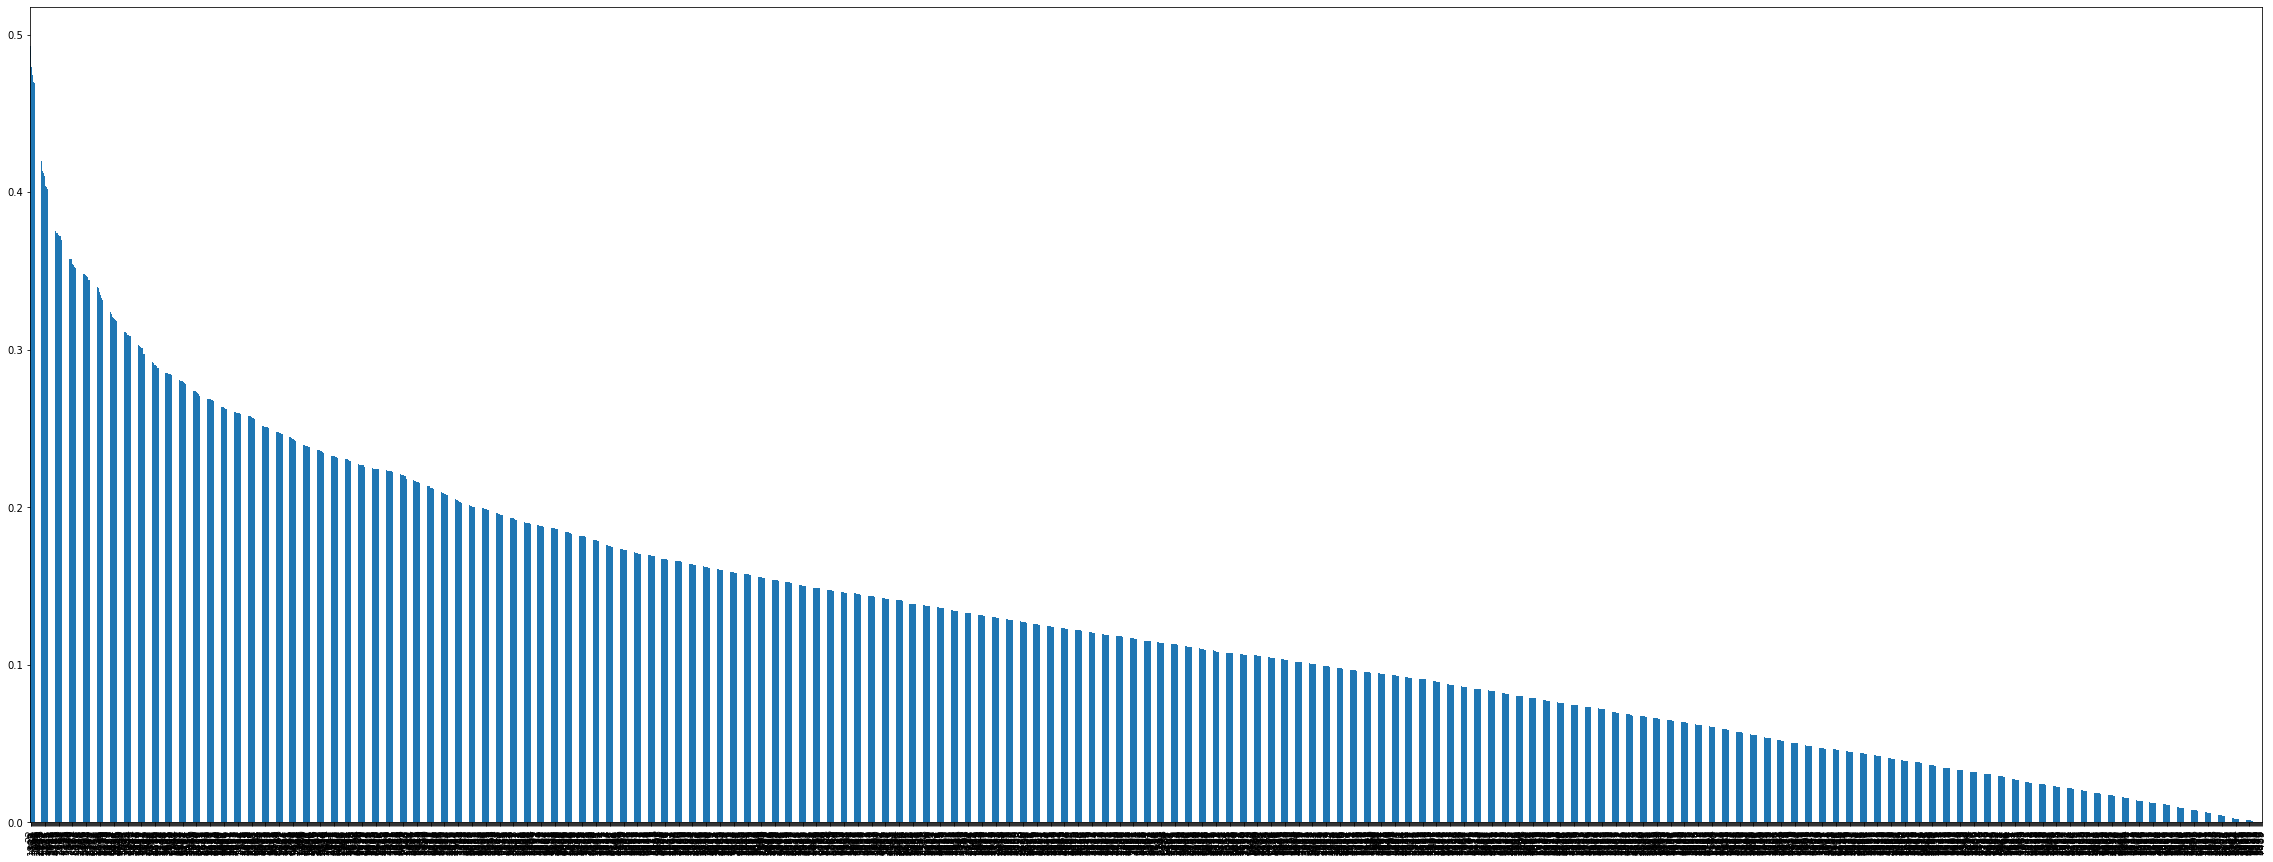

In [63]:
mutual_info=pd.Series(mutual_information)
mutual_info.index=required_features_t
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info.plot.bar(figsize=(40,15))

In [64]:
required_indices = (-mutual_information).argsort()[:number_of_features_required_3]
selected_features_mi=[]
selected_indices=[]
for i in range(number_of_features_required_3):
    required_indices[i] = required_indices[i] + 1
    selected_indices.append(required_indices[i])
    selected_features_mi.append(feature_name[required_indices[i]])
    print('Selected Feature '+str(i+1)+ ' is : ', feature_name[required_indices[i]])

Selected Feature 1 is :  1884_s_at 
Selected Feature 2 is :  38455_at 
Selected Feature 3 is :  37413_at 
Selected Feature 4 is :  41206_r_at 
Selected Feature 5 is :  752_s_at 
Selected Feature 6 is :  37408_at 
Selected Feature 7 is :  33361_at 
Selected Feature 8 is :  675_at 
Selected Feature 9 is :  36782_s_at 
Selected Feature 10 is :  38282_at 
Selected Feature 11 is :  684_at 
Selected Feature 12 is :  40783_s_at 
Selected Feature 13 is :  556_s_at 
Selected Feature 14 is :  38411_at 
Selected Feature 15 is :  970_r_at 
Selected Feature 16 is :  39741_at 
Selected Feature 17 is :  227_g_at 
Selected Feature 18 is :  461_at 
Selected Feature 19 is :  33866_at 
Selected Feature 20 is :  34907_at 
Selected Feature 21 is :  41096_at 
Selected Feature 22 is :  31692_at 
Selected Feature 23 is :  36963_at 
Selected Feature 24 is :  608_at 
Selected Feature 25 is :  38126_at 
Selected Feature 26 is :  40106_at 
Selected Feature 27 is :  33102_at 
Selected Feature 28 is :  32821_at 
Se

Selected Feature 227 is :  37759_at 
Selected Feature 228 is :  34646_at 
Selected Feature 229 is :  38950_r_at 
Selected Feature 230 is :  905_at 
Selected Feature 231 is :  1153_f_at 
Selected Feature 232 is :  39069_at 
Selected Feature 233 is :  39694_at 
Selected Feature 234 is :  36192_at 
Selected Feature 235 is :  40304_at 
Selected Feature 236 is :  35983_at 
Selected Feature 237 is :  35378_at 
Selected Feature 238 is :  37407_s_at 
Selected Feature 239 is :  613_at 
Selected Feature 240 is :  40636_at 
Selected Feature 241 is :  1366_i_at 
Selected Feature 242 is :  1790_s_at 
Selected Feature 243 is :  41209_at 
Selected Feature 244 is :  39350_at 
Selected Feature 245 is :  1451_s_at 
Selected Feature 246 is :  39733_at 
Selected Feature 247 is :  33994_g_at 
Selected Feature 248 is :  32643_at 
Selected Feature 249 is :  32275_at 
Selected Feature 250 is :  723_s_at 
Selected Feature 251 is :  894_g_at 
Selected Feature 252 is :  1034_at 
Selected Feature 253 is :  35837_

Selected Feature 826 is :  39700_at 
Selected Feature 827 is :  36156_at 
Selected Feature 828 is :  32468_f_at 
Selected Feature 829 is :  31315_at 
Selected Feature 830 is :  1237_at 
Selected Feature 831 is :  34891_at 
Selected Feature 832 is :  32717_at 
Selected Feature 833 is :  1323_at 
Selected Feature 834 is :  38631_at 
Selected Feature 835 is :  38998_g_at 
Selected Feature 836 is :  41428_at 
Selected Feature 837 is :  41140_at 
Selected Feature 838 is :  36636_at 
Selected Feature 839 is :  34348_at 
Selected Feature 840 is :  922_at 
Selected Feature 841 is :  39685_at 
Selected Feature 842 is :  36890_at 
Selected Feature 843 is :  40297_at 
Selected Feature 844 is :  35670_at 
Selected Feature 845 is :  1930_at 
Selected Feature 846 is :  32756_at 
Selected Feature 847 is :  AFFX-HSAC07/X00351_3_at 
Selected Feature 848 is :  36398_at 
Selected Feature 849 is :  37420_i_at 
Selected Feature 850 is :  40593_at 
Selected Feature 851 is :  31509_at 
Selected Feature 852 i

Selected Feature 1488 is :  34835_at 
Selected Feature 1489 is :  31583_at 
Selected Feature 1490 is :  41641_at 
Selected Feature 1491 is :  31610_at 
Selected Feature 1492 is :  37329_at 
Selected Feature 1493 is :  32243_g_at 
Selected Feature 1494 is :  32525_r_at 
Selected Feature 1495 is :  38398_at 
Selected Feature 1496 is :  37473_at 
Selected Feature 1497 is :  40161_at 
Selected Feature 1498 is :  41783_at 
Selected Feature 1499 is :  39173_at 
Selected Feature 1500 is :  40771_at 
Selected Feature 1501 is :  32316_s_at 
Selected Feature 1502 is :  40042_r_at 
Selected Feature 1503 is :  36702_at 
Selected Feature 1504 is :  36629_at 
Selected Feature 1505 is :  35966_at 
Selected Feature 1506 is :  1005_at 
Selected Feature 1507 is :  39050_at 
Selected Feature 1508 is :  36634_at 
Selected Feature 1509 is :  38647_at 
Selected Feature 1510 is :  32199_at 
Selected Feature 1511 is :  34678_at 
Selected Feature 1512 is :  38775_at 
Selected Feature 1513 is :  40850_at 
Selec

In [65]:
required_features_mi = selected_features_mi
print('Length of required features : '+str(len(required_features_mi)))
print(required_features_mi)

Length of required features : 2394
['1884_s_at ', '38455_at ', '37413_at ', '41206_r_at ', '752_s_at ', '37408_at ', '33361_at ', '675_at ', '36782_s_at ', '38282_at ', '684_at ', '40783_s_at ', '556_s_at ', '38411_at ', '970_r_at ', '39741_at ', '227_g_at ', '461_at ', '33866_at ', '34907_at ', '41096_at ', '31692_at ', '36963_at ', '608_at ', '38126_at ', '40106_at ', '33102_at ', '32821_at ', 'AFFX ', '32774_at ', '38798_s_at ', '32796_f_at ', '691_g_at ', '37187_at ', '33813_at ', '37005_at ', '1752_at ', '36591_at ', '41423_at ', '34375_at ', '32728_at ', '39025_at ', '37430_at ', '36152_at ', '1230_g_at ', '1768_s_at ', '32321_at ', '37831_at ', '917_g_at ', '33409_at ', '1771_s_at ', '40875_s_at ', '40087_at ', '37920_at ', '35436_at ', '32836_at ', '40367_at ', '33213_g_at ', '38125_at ', '39315_at ', '38713_at ', '32749_s_at ', '32787_at ', '39119_s_at ', '2092_s_at ', '39610_at ', '37035_at ', '31850_at ', '2088_s_at ', '409_at ', '33546_at ', '39353_at ', '37365_at ', '39360

In [66]:
X_train3 = X_train[required_features_mi]
X_train3.head()

,1884_s_at,38455_at,37413_at,41206_r_at,752_s_at,37408_at,33361_at,675_at,36782_s_at,38282_at,...,AFFX-M27830_M_at,41365_at,1815_g_at,35707_at,37281_at,40436_g_at,1898_at,33860_at,37323_r_at,38019_at
116,-1.018072,-0.082532,-0.066871,-0.194976,1.279749,-0.001995,-0.486414,-0.306311,-0.341198,-1.844628,...,0.056547,-0.444424,2.307096,-0.706231,0.412456,-0.462626,-0.539698,-0.108962,-0.608559,-0.243093
55,-0.430980,0.581758,-0.707699,0.166974,-0.292776,-0.265310,-0.528667,-0.015265,-0.210745,0.280836,...,-1.194563,-0.094215,0.486043,1.179513,0.178360,-1.033269,-0.557080,0.008771,-0.164605,0.116371
26,0.670832,0.587885,-0.430528,-0.334384,-1.038889,-0.102774,-0.286547,-0.595273,0.063685,0.533418,...,2.220649,-0.255566,0.165290,1.178049,0.087035,0.610069,-0.342427,-0.544601,0.195276,0.019970
130,0.477208,1.301678,0.643890,0.778008,-1.086947,0.600463,-0.068910,0.680636,-0.190240,0.866818,...,-0.938275,-0.256322,0.069621,0.009819,0.621938,-1.613347,-0.304878,-0.876388,0.083623,-0.101995
177,1.029765,0.784629,0.070204,1.474668,0.891859,-0.461395,-0.243787,-0.857305,-0.259252,-0.630229,...,-0.420235,-0.366060,-0.627125,-0.735260,1.133442,-0.562949,2.218545,0.521349,-0.713366,0.259681


In [67]:
X_test3 = X_test[required_features_mi]
X_test3.head()

,1884_s_at,38455_at,37413_at,41206_r_at,752_s_at,37408_at,33361_at,675_at,36782_s_at,38282_at,...,AFFX-M27830_M_at,41365_at,1815_g_at,35707_at,37281_at,40436_g_at,1898_at,33860_at,37323_r_at,38019_at
18,1.599081,1.650114,-0.548771,-0.107197,-0.581610,-0.440549,-0.600197,0.260030,-0.241907,-0.984313,...,-0.532669,-0.367571,0.620470,-0.478073,0.509644,0.148333,-0.506344,-1.135100,-0.330140,-0.966692
45,-0.202378,-0.204051,0.070018,-0.077887,-0.507992,0.107123,0.107179,0.153202,-0.073493,0.945556,...,0.398287,-0.332356,-0.298019,0.258158,0.228697,-0.030015,-0.328065,0.297080,1.091458,-0.548273
33,0.154968,1.126087,0.965374,0.043234,0.200791,0.757983,-0.268100,1.062972,0.111825,0.888141,...,-1.198662,0.004189,0.106486,-0.594316,0.103990,-1.484428,0.255360,1.840118,0.418435,0.877498
37,-0.372449,-0.557179,-0.139314,-0.777271,-0.315824,0.462747,0.198538,1.626935,0.145706,1.028240,...,-0.752890,-0.045409,-0.156688,-0.464450,-0.388287,-1.233094,-0.403330,-0.982597,1.218872,-0.133869
109,0.266825,-0.553240,-0.437363,-1.692249,1.815612,-0.049029,-0.321297,-0.770710,0.066772,-1.936427,...,0.794263,-0.286347,-0.626234,-0.149077,0.122583,0.144817,-0.198508,-0.497520,-1.224204,-0.297091


In [68]:
X_test3.shape

(41, 2394)

In [69]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train3)

y_test3 = np.array([a+1 for a in y_test])

print(y_test3)

[1 1 1 1 4 1 1 1 4 1 4 5 2 1 5 1 1 1 1 1 1 1 1 1 2 1 1 4 1 5 5 1 1 1 2 1 1
 1 1 2 5 1 1 2 5 1 1 1 1 4 1 1 1 1 1 5 4 2 1 1 1 4 3 5 1 1 1 1 1 1 2 1 1 1
 1 1 5 1 2 1 5 1 1 1 1 1 1 1 4 5 1 1 1 1 3 4 3 1 5 1 1 1 1 1 1 1 1 4 1 1 1
 4 1 1 1 1 3 1 1 1 1 2 1 4 1 4 1 4 2 4 2 1 1 1 1 1 2 5 1 1 1 4 1 5 4 5 1 1
 2 1 1 1 1 1 1 1 5 1 5 1 1 4]
[1 1 1 1 1 1 1 1 1 2 1 5 4 3 2 1 1 1 1 1 1 2 1 1 1 2 5 4 3 1 5 1 1 1 1 1 1
 1 1 4 1]


# KNN Classifier

In [70]:
temp_fscore=0
temp_cm = np.zeros([5,5])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
     
    f_score_knn = f1_score(y_test3, y_test_prediction,average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 97.5610
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 95.6790
Testing accuracy on selected features for 2 neighbors: 97.5610
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 96.9136
Testing accuracy on selected features for 3 neighbors: 97.5610
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 95.6790
Testing accuracy on selected features for 4 neighbors: 95.1220
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 96.2963
Testing accuracy on selected features for 5 neighbors: 95.1220
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 94.4444
Testing accuracy on selected features for 6 neighbors: 95.1220
KNN Classfier for 7 neighbors:
Training accuracy on

In [71]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[29  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  2  0  0]
 [ 1  0  0  2  0]
 [ 0  0  0  0  3]]
Average Confusion matrix is : [[29.          0.          0.          0.          0.        ]
 [ 0.57894737  3.42105263  0.          0.          0.        ]
 [ 1.31578947  0.          0.68421053  0.          0.        ]
 [ 1.21052632  0.          0.          1.78947368  0.        ]
 [ 0.          0.          0.          0.          3.        ]]


Confusion Matrix of KNN Classifier:


<AxesSubplot:>

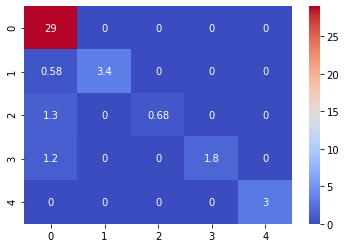

In [72]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [73]:
f_score_knn = f1_score(y_test3, max_y_test_prediction,average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.975609756097561
Average F-Score is : 0.9242618741976895


# SVM(Support Vector Machine)

In [74]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 98.7654
Testing accuracy on selected features: 90.2439


In [75]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[29  0  0  0  0]
 [ 1  3  0  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  2  0]
 [ 0  0  0  0  3]]


Confusion Matrix of SVM Classifier:


<AxesSubplot:>

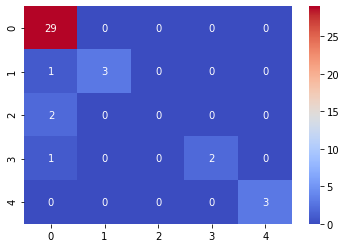

In [76]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [77]:
f_score_svc = f1_score(y_test3, y_test_prediction_svc,average='micro')

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.9024390243902439
